# Annotations

In [4]:
import xml.etree.ElementTree as ET

xml_path = "/home/student/Repositories/lung-cancer-detection/LIDC-IDRI/CT/test/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/069.xml"

tree = ET.parse(xml_path)

root = tree.getroot()

_ = lambda s: "{http://www.nih.gov}" + str(s) # adds namespace name to string


In [15]:
nodule_z_positions = [
    float(z_position.text)
    for reading_session in root.findall(_('readingSession'))
    for unblinded_read_nodule in reading_session.findall(_('unblindedReadNodule'))
    for roi in unblinded_read_nodule.findall(_('roi'))
    for z_position in roi.findall(_('imageZposition'))    
]
nodule_z_positions

[-125.0,
 -122.5,
 -120.0,
 -117.5,
 -115.0,
 -112.5,
 -110.0,
 -107.5,
 -150.0,
 -175.0,
 -175.0,
 -107.5,
 -110.0,
 -112.5,
 -115.0,
 -117.5,
 -120.0,
 -122.5,
 -175.0,
 -175.0,
 -150.0,
 -107.5,
 -110.0,
 -112.5,
 -115.0,
 -117.5,
 -120.0,
 -122.5,
 -125.0,
 -105.0,
 -107.5,
 -110.0,
 -112.5,
 -115.0,
 -117.5,
 -120.0,
 -122.5,
 -125.0,
 -175.0,
 -175.0,
 -150.0]

In [6]:
nodule_x_positions =[
    float(x_coord.text)
    for reading_session in [root.find(_('readingSession'))]
    for unblinded_read_nodule in [reading_session.find(_('unblindedReadNodule'))]
    for roi in [unblinded_read_nodule.find(_('roi'))]
    for edge_map in roi.findall(_('edgeMap'))
    for x_coord in edge_map.findall(_('xCoord'))    
]
nodule_x_positions[:5]

[312.0, 311.0, 310.0, 309.0, 308.0]

In [7]:
nodule_y_positions =[
    float(y_coord.text)
    for reading_session in [root.find(_('readingSession'))]
    for unblinded_read_nodule in [reading_session.find(_('unblindedReadNodule'))]
    for roi in [unblinded_read_nodule.find(_('roi'))]
    for edge_map in roi.findall(_('edgeMap'))
    for y_coord in edge_map.findall(_('yCoord'))    
]
nodule_y_positions[:5]

[355.0, 356.0, 357.0, 357.0, 358.0]

In [8]:
assert len(nodule_x_positions) == len(nodule_y_positions)

In [9]:
import pydicom
dcm_path = "/home/student/Repositories/lung-cancer-detection/LIDC-IDRI/CT/test/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/1-047.dcm"

dcm = pydicom.dcmread(dcm_path)
dcm.SliceLocation

'-125.0'

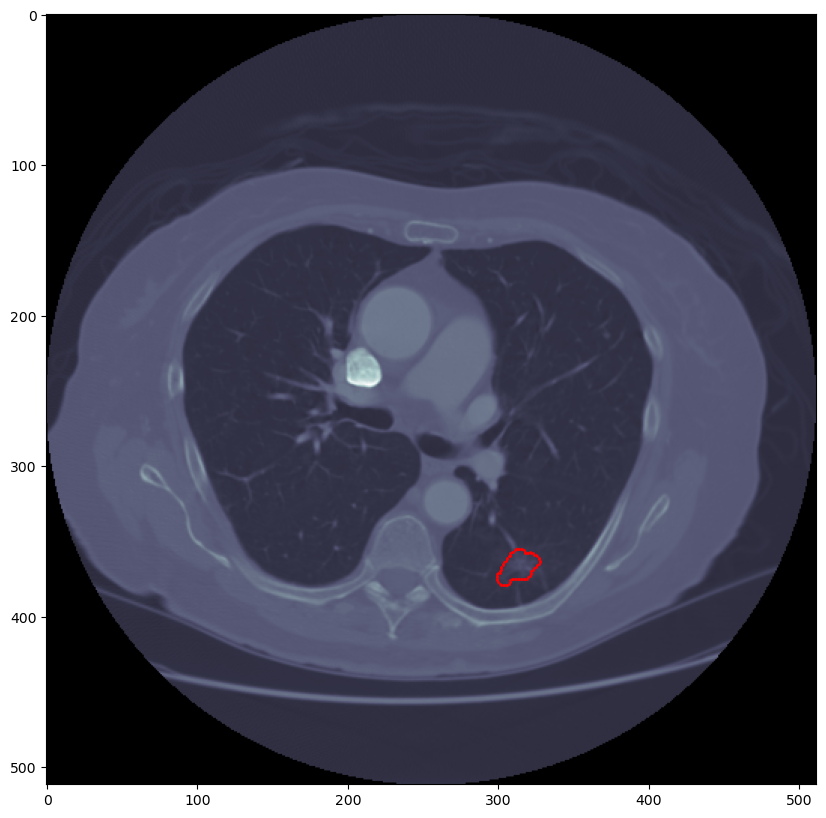

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.imshow(dcm.pixel_array, cmap="bone")

plt.scatter(x=nodule_x_positions, y=nodule_y_positions, c='r', s=1)

plt.show()

In [36]:
XML_NAMESPACE = "{http://www.nih.gov}"

def process_annotation(xml_path):
    tree = ET.parse(xml_path)

    root = tree.getroot()

    _ = lambda s: XML_NAMESPACE + str(s) # adds namespace name to string

    nodule_z_positions = [
        float(z_position.text)
        for reading_session in root.findall(_('readingSession'))
        for unblinded_read_nodule in reading_session.findall(_('unblindedReadNodule'))
        for roi in unblinded_read_nodule.findall(_('roi'))
        for z_position in roi.findall(_('imageZposition'))    
    ]

    return set(nodule_z_positions)

In [37]:
dcm.SliceLocation in process_annotation(xml_path)

True